# Langkah 1: Memuat Dataset dan Mengimpor Library

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan visualisasi tampil langsung pada notebook
%matplotlib inline

# Memuat dataset dari GitHub
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
df = pd.read_csv(url)

# Menampilkan 5 baris pertama dataset
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Langkah 2: Menyajikan Informasi Dataset

In [3]:
# Menampilkan informasi umum tentang dataset
print("Informasi Dataset:")
df.info()

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
# Check if 'duration' or 'duration_int' is the actual column name:
if 'duration' in df.columns:
    print(df[['release_year', 'duration']].describe()) # Use 'duration' if it exists
else:
    print(df[['release_year']].describe()) # Only use release_year if neither 'duration' nor 'duration_int' found
    print("Warning: 'duration' and 'duration_int' columns not found. Descriptive statistics calculated for 'release_year' only.")


# Menampilkan jumlah nilai hilang pada setiap kolom
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isna().sum())



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Statistik Deskriptif:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Jumlah Nilai Hilang per Kolom

# Langkah 3: Visualisasi Distribusi Tipe Tayangan

<ipython-input-4-64d94ea864d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


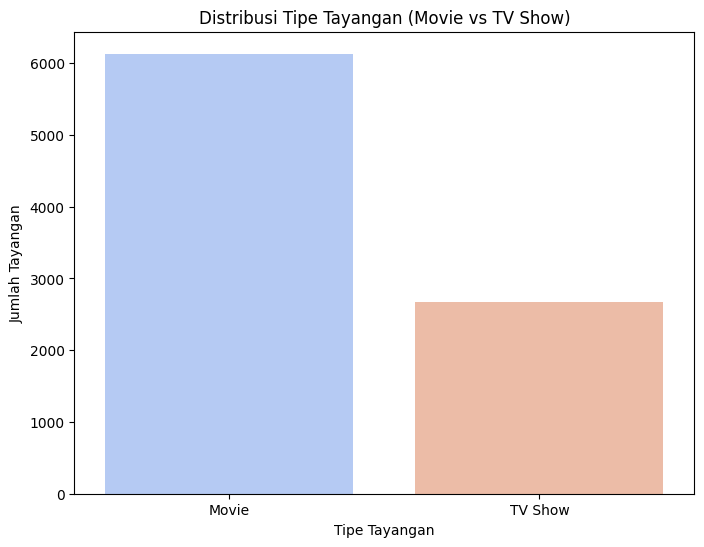

In [4]:
# Visualisasi distribusi tipe tayangan (Movie vs TV Show)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Distribusi Tipe Tayangan (Movie vs TV Show)")
plt.xlabel("Tipe Tayangan")
plt.ylabel("Jumlah Tayangan")
plt.show()



# Langkah 4: Visualisasi Distribusi Tahun Rilis

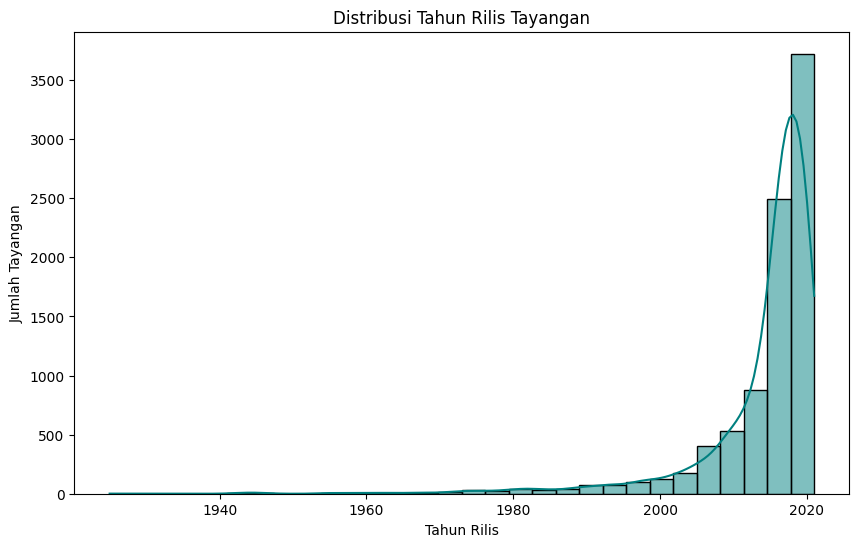

In [5]:
# Visualisasi distribusi tahun rilis tayangan
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='teal')
plt.title("Distribusi Tahun Rilis Tayangan")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Tayangan")
plt.show()


# Langkah 5: Visualisasi Distribusi Rating Tayangan

<ipython-input-6-c2cab32e2563>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')


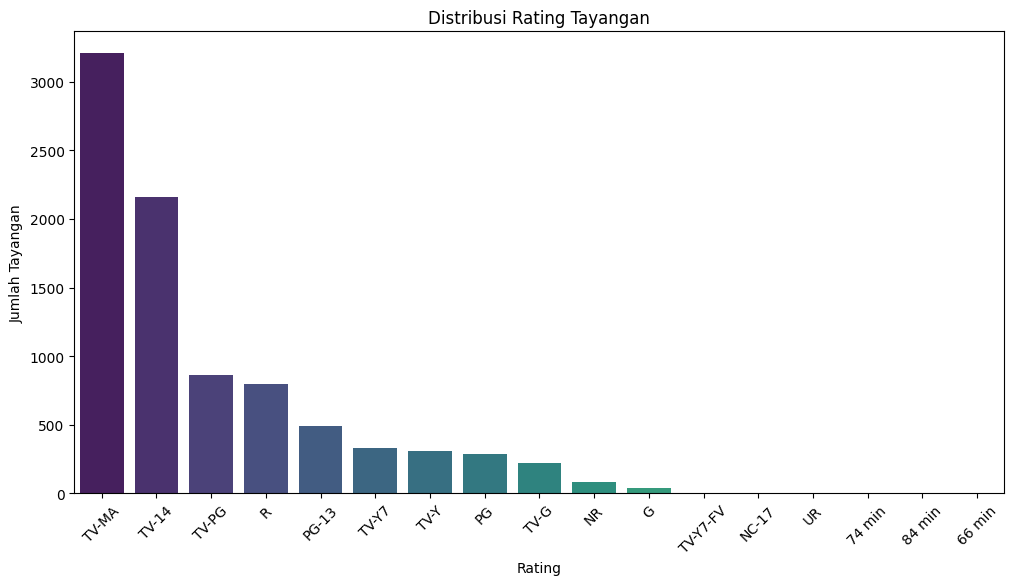

In [6]:
# Visualisasi distribusi rating tayangan
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distribusi Rating Tayangan")
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Jumlah Tayangan")
plt.show()


# Langkah 6: Visualisasi Jumlah Tayangan per Bulan Penambahan

<ipython-input-7-c5ff472730c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='added_month', palette='coolwarm')


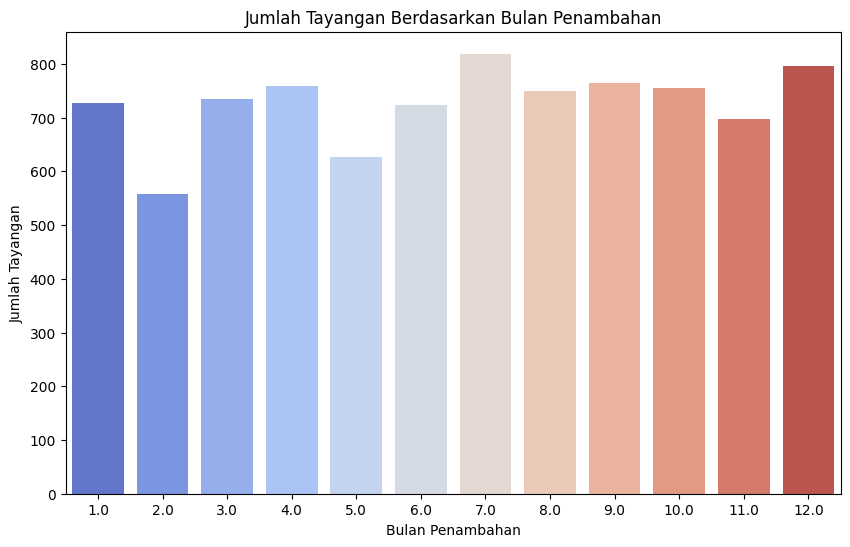

In [7]:
# Menambahkan kolom bulan penambahan dari kolom 'date_added'
df['added_month'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month

# Visualisasi jumlah tayangan berdasarkan bulan penambahan
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='added_month', palette='coolwarm')
plt.title("Jumlah Tayangan Berdasarkan Bulan Penambahan")
plt.xlabel("Bulan Penambahan")
plt.ylabel("Jumlah Tayangan")
plt.show()


# Langkah 7: Visualisasi Durasi untuk Movie (dalam menit)

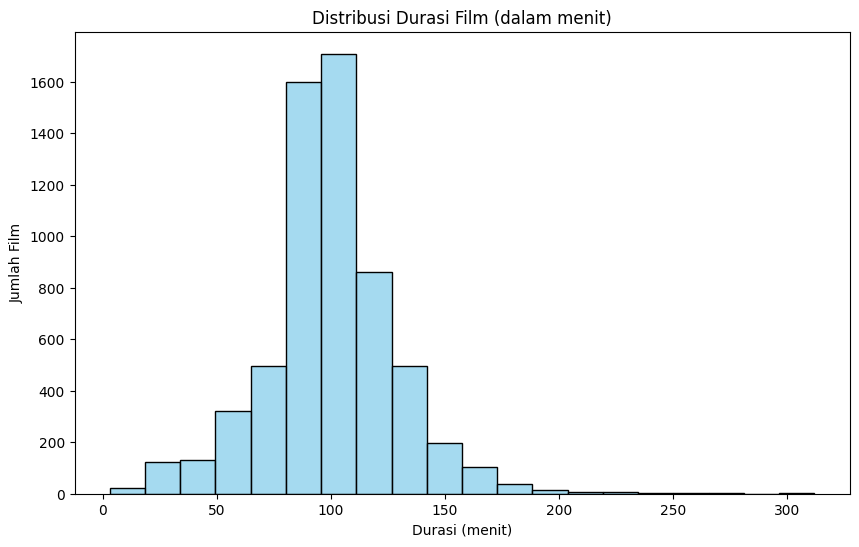

In [9]:
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)

# Visualisasi durasi untuk Movie (dalam menit)
plt.figure(figsize=(10,6))
sns.histplot(df[df['type'] == 'Movie']['duration_int'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("Distribusi Durasi Film (dalam menit)")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.show()


# Langkah 8: Visualisasi Jumlah Season untuk TV Show

<ipython-input-10-525766d630ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['type'] == 'TV Show'], x='duration_int', palette='viridis')


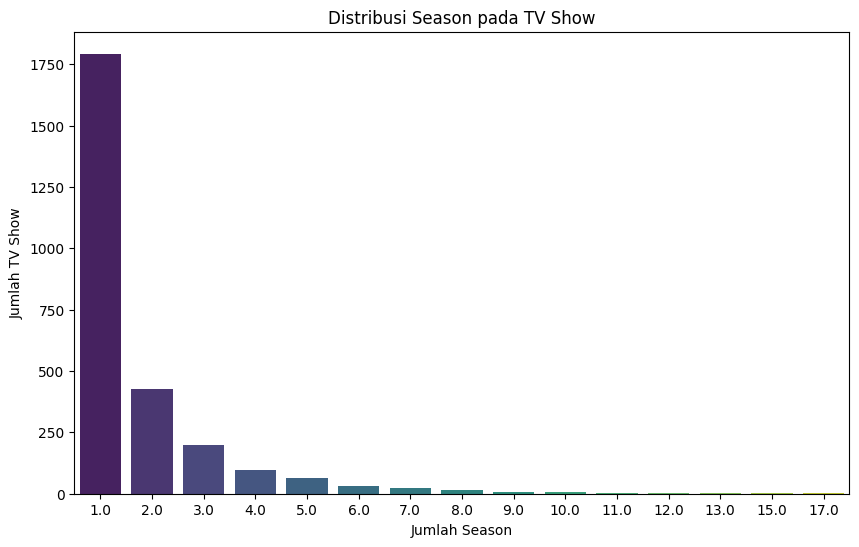

In [10]:
# Visualisasi jumlah season untuk TV Show
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['type'] == 'TV Show'], x='duration_int', palette='viridis')
plt.title("Distribusi Season pada TV Show")
plt.xlabel("Jumlah Season")
plt.ylabel("Jumlah TV Show")
plt.show()


### Mean (Rata-Rata)
The mean is calculated as follows:
$$
\text{mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
**Penjelasan:** Rata-rata dihitung dengan menjumlahkan semua nilai data dan membaginya dengan jumlah data $( n )$.

### Variance (Variansi)
The variance is calculated using the formula:
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} \left(x_i - \text{mean}\right)^2
$$
**Penjelasan:** Variansi mengukur seberapa jauh nilai-nilai data tersebar dari rata-rata. Nilai yang lebih tinggi menunjukkan penyebaran data yang lebih besar.

### Standard Deviation (Simpangan Baku)
The standard deviation is computed as:
$$
\sigma = \sqrt{\sigma^2}
$$
**Penjelasan:** Simpangan baku adalah akar kuadrat dari variansi dan memberikan ukuran sebaran data dalam satuan yang sama dengan data aslinya.

1. Distribusi Tipe Tayangan (Movie vs. TV Show)
python
Salin
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Distribusi Tipe Tayangan (Movie vs TV Show)")
plt.show()
Penjelasan Matematis:

Countplot menghitung frekuensi masing-masing kategori dalam kolom type (misalnya, 'Movie' dan 'TV Show').

Misalkan:

Jumlah 'Movie' =
𝑀
M

Jumlah 'TV Show' =
𝑇
T

Maka, total tayangan =
𝑀
+
𝑇
M+T

Proporsi 'Movie' =
𝑀
𝑀
+
𝑇
M+T
M
​


Proporsi 'TV Show' =
𝑇
𝑀
+
𝑇
M+T
T
​


Visualisasi ini membantu memahami distribusi proporsi tayangan berdasarkan jenisnya.

2. Distribusi Rating Tayangan
python
Salin
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title("Distribusi Rating Tayangan")
plt.xticks(rotation=45)
plt.show()
Penjelasan Matematis:

Countplot menghitung frekuensi masing-masing kategori dalam kolom rating.

Misalkan:

Jumlah tayangan dengan rating 'PG' =
𝑅
𝑃
𝐺
R
PG
​


Jumlah tayangan dengan rating 'R' =
𝑅
𝑅
R
R
​


Jumlah tayangan dengan rating 'TV-MA' =
𝑅
𝑇
𝑉
−
𝑀
𝐴
R
TV−MA
​


Maka, total tayangan =
𝑅
𝑃
𝐺
+
𝑅
𝑅
+
𝑅
𝑇
𝑉
−
𝑀
𝐴
+
…
R
PG
​
 +R
R
​
 +R
TV−MA
​
 +…

Proporsi tayangan dengan rating 'PG' =
𝑅
𝑃
𝐺
𝑅
𝑃
𝐺
+
𝑅
𝑅
+
𝑅
𝑇
𝑉
−
𝑀
𝐴
+
…
R
PG
​
 +R
R
​
 +R
TV−MA
​
 +…
R
PG
​

​


Visualisasi ini membantu memahami distribusi rating tayangan di platform.

3. Jumlah Tayangan Berdasarkan Bulan Penambahan
python
Salin
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='added_month', palette="viridis")
plt.title("Jumlah Tayangan Berdasarkan Bulan Penambahan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Tayangan")
plt.show()
Penjelasan Matematis:

Countplot menghitung frekuensi tayangan yang ditambahkan pada setiap bulan.

Misalkan:

Jumlah tayangan yang ditambahkan pada Januari =
𝐽
𝐽
𝑎
𝑛
J
Jan
​


Jumlah tayangan yang ditambahkan pada Februari =
𝐽
𝐹
𝑒
𝑏
J
Feb
​


Jumlah tayangan yang ditambahkan pada Maret =
𝐽
𝑀
𝑎
𝑟
J
Mar
​


Maka, total tayangan yang ditambahkan =
𝐽
𝐽
𝑎
𝑛
+
𝐽
𝐹
𝑒
𝑏
+
𝐽
𝑀
𝑎
𝑟
+
…
J
Jan
​
 +J
Feb
​
 +J
Mar
​
 +…

Proporsi tayangan yang ditambahkan pada Januari =
𝐽
𝐽
𝑎
𝑛
𝐽
𝐽
𝑎
𝑛
+
𝐽
𝐹
𝑒
𝑏
+
𝐽
𝑀
𝑎
𝑟
+
…
J
Jan
​
 +J
Feb
​
 +J
Mar
​
 +…
J
Jan
​

​


Visualisasi ini membantu memahami tren penambahan tayangan berdasarkan bulan.

4. Distribusi Durasi Film (dalam menit)
python
Salin
plt.figure(figsize=(10,4))
sns.histplot(df[df['type'] == 'Movie']['duration_int'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("Distribusi Durasi Film (dalam menit)")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.show()
Penjelasan Matematis:

Histplot menghitung frekuensi durasi film dalam interval tertentu.

Misalkan:

Jumlah film dengan durasi antara 0-30 menit =
𝐷
0
−
30
D
0−30
​


Jumlah film dengan durasi antara 31-60 menit =
𝐷
31
−
60
D
31−60
​


Jumlah film dengan durasi antara 61-90 menit =
𝐷
61
−
90
D
61−90
​


Maka, total film =
𝐷
0
−
30
+
𝐷
31
−
60
+
𝐷
61
−
90
+
…
D
0−30
​
 +D
31−60
​
 +D
61−90
​
 +…

Proporsi film dengan durasi antara 0-30 menit =
𝐷
0
−
30
𝐷
0
−
30
+
𝐷
31
−
60
+
𝐷
61
−
90
+
…
D
0−30
​
 +D
31−60
​
 +D
61−90
​
 +…
D
0−30
​

​


Visualisasi ini membantu memahami distribusi durasi film di platform.

5. Distribusi Jumlah Season pada TV Show
python
Salin
plt.figure(figsize=(6,4))
sns.countplot(x='duration_int', data=df[df['type'] == 'TV Show'])
plt.title("Distribusi Season pada TV Show")
plt.xlabel("Jumlah Season")
plt.ylabel("Jumlah TV Show")
plt.show()
Penjelasan Matematis:

Countplot menghitung frekuensi jumlah season pada TV Show.

Misalkan:

Jumlah TV Show dengan 1 season =
𝑆
1
S
1
​


Jumlah TV Show dengan 2 season =
𝑆
2
S
2
​


Jumlah TV Show dengan 3 season =
𝑆
3
S
3
​


Maka, total TV Show =
𝑆
1
+
𝑆
2
+
𝑆
3
+
…
S
1
​
 +S
2
​
 +S
3
​
 +…

Proporsi TV Show dengan 1 season =
𝑆
1
𝑆
1
+
𝑆
2
+
𝑆
3
+
…
S
1
​
 +S
2
​
 +S
3
​
 +…
S
1
​

​


